In [1]:
import tensorflow as tf

# Define the directory containing the images
directory = 'dataset'

# Specify the class names
class_names = ['Bacterialblight', 'Blast', 'Brownspot',"Healthy","Tungro"]
num_classes = tf.io.gfile.listdir(directory)
# Create a dataset using the images in the directory
train,test = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=16,
    image_size=(64, 64),
    shuffle=True,
    seed=42,
    validation_split=0.3,
    subset='both',
    class_names=class_names
)


Found 8164 files belonging to 5 classes.
Using 5715 files for training.
Using 2449 files for validation.


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def build_model():
    model = tf.keras.models.Sequential([
        Conv2D(128, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        #Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(500, activation='relu'),
        Dropout(0.5),
        Dense(100, activation='relu'),
        Dropout(0.5),
        Dense(5, activation='softmax')
    ])
    
    return model

In [3]:

# Load the model from the HDF5 file
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import datetime
loaded_model = build_model()

# Compile the model with a new loss function, optimizer, and metrics
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model with the TensorBoard callback
epochs = 30
history=loaded_model.fit(train,
          epochs=epochs,
          validation_data=test,
          callbacks=[tensorboard_callback])




Epoch 1/30
358/358 [==============================] - 902s 2s/step - loss: 1.1506 - accuracy: 0.5496 - val_loss: 1.1880 - val_accuracy: 0.5606
Epoch 2/30
358/358 [==============================] - 909s 3s/step - loss: 0.8213 - accuracy: 0.6670 - val_loss: 0.6776 - val_accuracy: 0.7215
Epoch 3/30
358/358 [==============================] - 879s 2s/step - loss: 0.7544 - accuracy: 0.6992 - val_loss: 0.6865 - val_accuracy: 0.7191
Epoch 4/30
358/358 [==============================] - 692s 2s/step - loss: 0.7078 - accuracy: 0.7206 - val_loss: 0.7149 - val_accuracy: 0.7027
Epoch 5/30
358/358 [==============================] - 850s 2s/step - loss: 0.6292 - accuracy: 0.7510 - val_loss: 2.0431 - val_accuracy: 0.4708
Epoch 6/30
358/358 [==============================] - 906s 3s/step - loss: 0.5851 - accuracy: 0.7661 - val_loss: 0.7131 - val_accuracy: 0.7007
Epoch 7/30
358/358 [==============================] - 922s 3s/step - loss: 0.5719 - accuracy: 0.7830 - val_loss: 1.1870 - val_accuracy: 0.6742

In [4]:
loaded_model.save('my_model1.h5')

In [8]:
print(history)

None


In [5]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
model = load_model('my_model1.h5')
loss, accuracy = model.evaluate(test)

# Print the accuracy
print(f'Test accuracy: {accuracy*100:.2f}%')


154/154 [==============================] - 153s 787ms/step - loss: 0.5460 - accuracy: 0.7987
Test accuracy: 79.87%


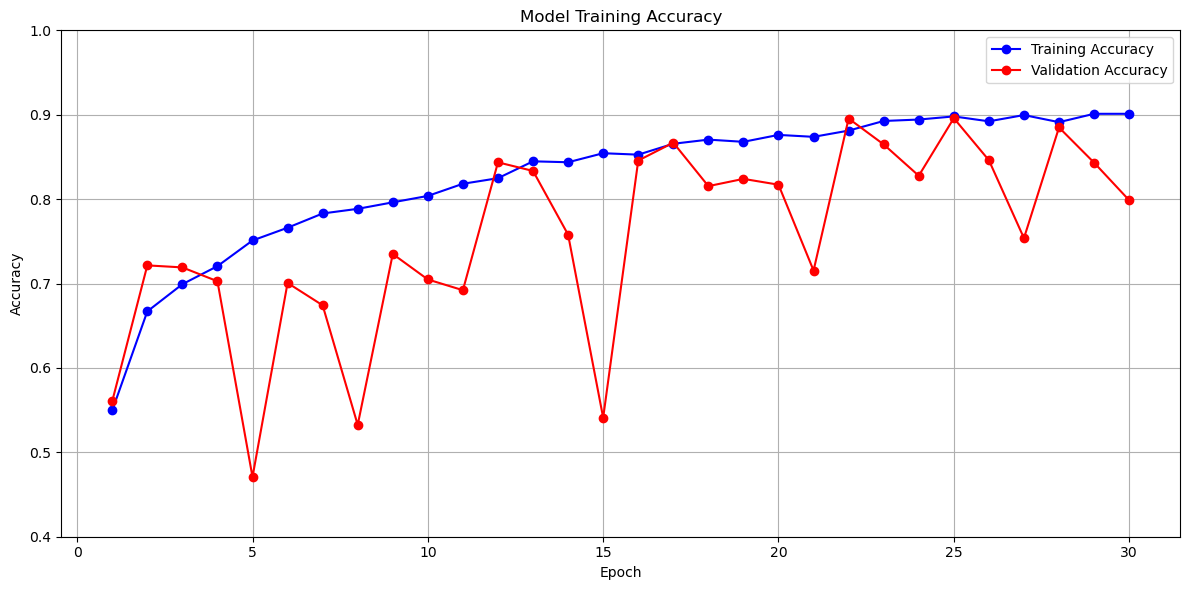

Max Training Accuracy: 0.9011
Max Validation Accuracy: 0.8959
Final Training Accuracy: 0.9011
Final Validation Accuracy: 0.7987


<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

# Extracted accuracy values
epochs = list(range(1, 31))
train_accuracy = [
    0.5496, 0.6670, 0.6992, 0.7206, 0.7510, 0.7661, 0.7830, 0.7885, 0.7962, 0.8038,
    0.8182, 0.8248, 0.8448, 0.8437, 0.8544, 0.8527, 0.8656, 0.8705, 0.8679, 0.8761,
    0.8738, 0.8812, 0.8926, 0.8943, 0.8980, 0.8922, 0.8996, 0.8912, 0.9011, 0.9011
]
val_accuracy = [
    0.5606, 0.7215, 0.7191, 0.7027, 0.4708, 0.7007, 0.6742, 0.5325, 0.7350, 0.7048,
    0.6921, 0.8436, 0.8334, 0.7579, 0.5410, 0.8457, 0.8669, 0.8154, 0.8240, 0.8171,
    0.7154, 0.8955, 0.8648, 0.8277, 0.8959, 0.8461, 0.7538, 0.8849, 0.8432, 0.7987
]

plt.figure(figsize=(12, 6))
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.4, 1.0)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('cnn_acuuracy.png', dpi=300)
print(f"Max Training Accuracy: {max(train_accuracy):.4f}")
print(f"Max Validation Accuracy: {max(val_accuracy):.4f}")
print(f"Final Training Accuracy: {train_accuracy[-1]:.4f}")
print(f"Final Validation Accuracy: {val_accuracy[-1]:.4f}")

In [1]:
model.summary()

NameError: name 'model' is not defined